In [52]:
import random

import matplotlib.pyplot as plt
import polars as pl

Read dataframe


In [84]:
filename = "filedb.feather"

In [85]:
df = pl.read_ipc(filename)

In [86]:
# shuffle dataframe
def shuffle(df: pl.DataFrame, rand_col="rnd") -> pl.DataFrame:
    return df.with_columns(pl.Series(rand_col, [random.random() for _ in range(len(df))])).sort(rand_col).drop(rand_col)

In [87]:
# save shuffled
shuffle(df).write_ipc(filename)

plot resolution vs modified time

Text(0, 0.5, 'sum resolution')

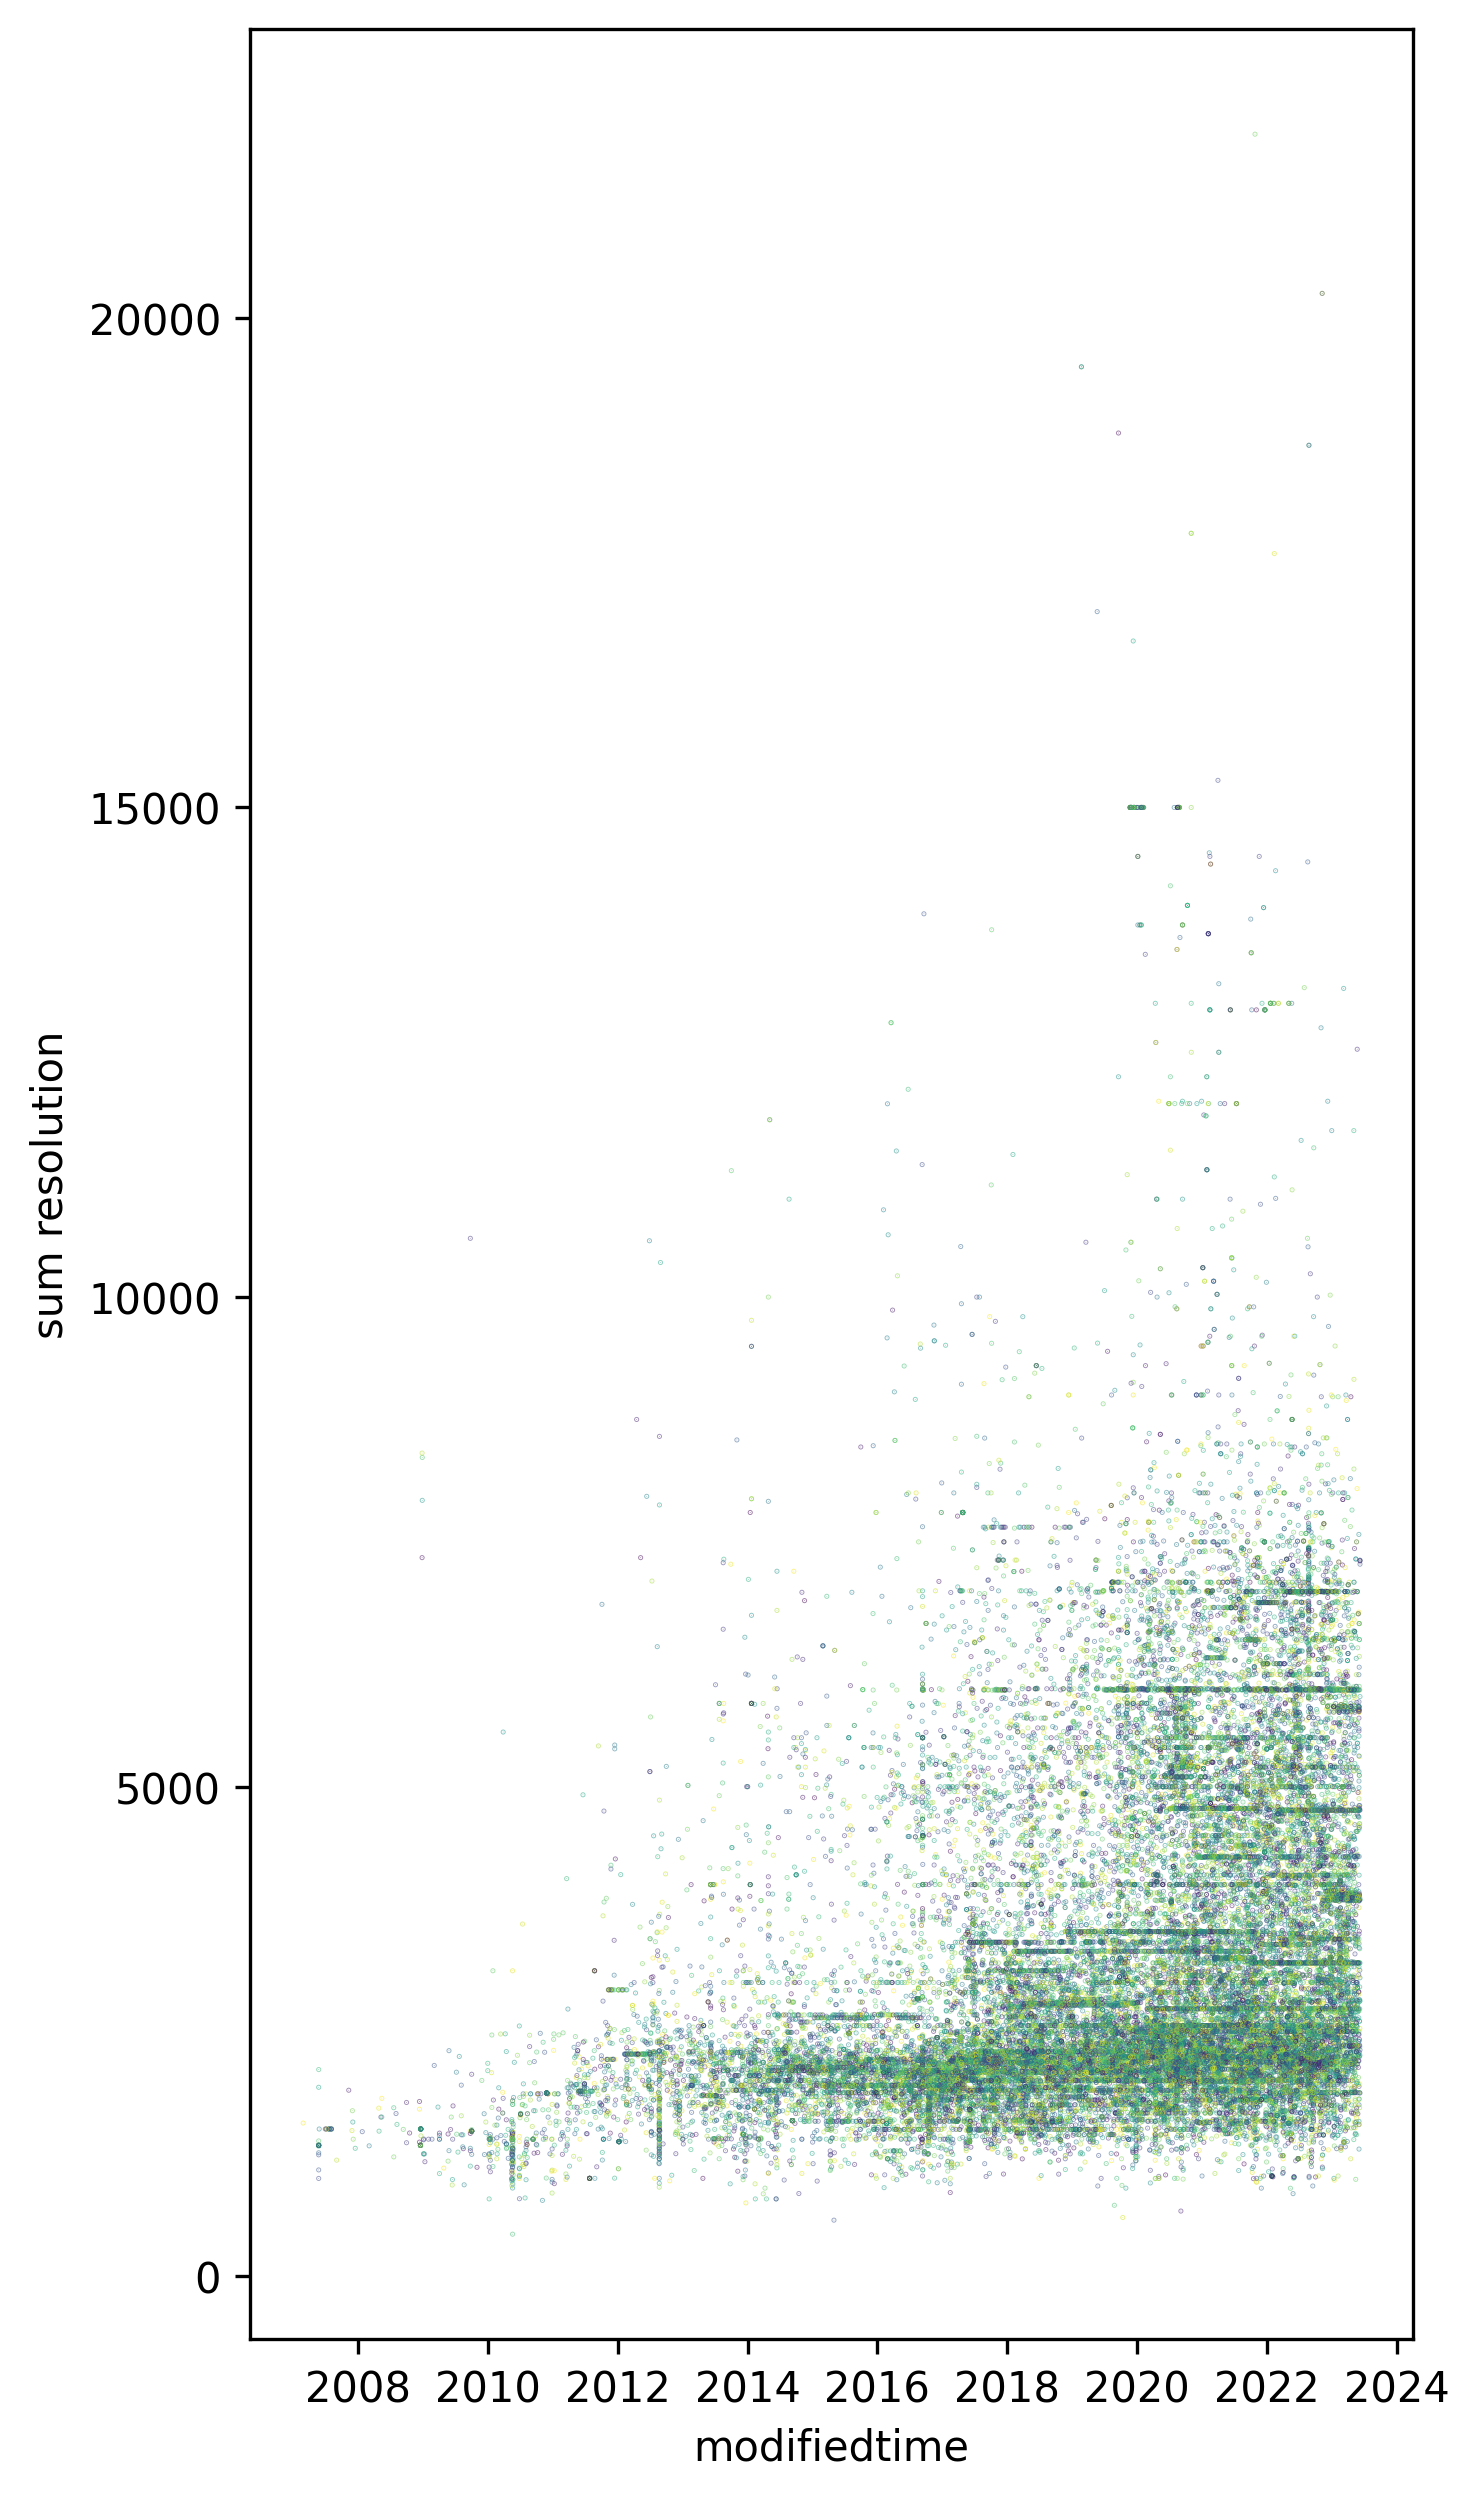

In [89]:
plt.figure(figsize=(5, 10), dpi=300)
plt.scatter(
    x=df.select("modifiedtime"),
    y=df.with_columns(sum_res=pl.col("resolution").apply(lambda lst: sum(lst))).select("sum_res"),
    s=0.05,
    c=df.select("checkedtime"),
    alpha=0.5
)
plt.xlabel("modifiedtime")
plt.ylabel("sum resolution")